In [1]:
library(Seurat)
library(ggplot2)
library(Matrix)
library(DoubletFinder)
library(dplyr) # for functions

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
packageVersion("Seurat")
R.version.string

[1] ‘5.0.3’

[1] "R version 4.2.0 (2022-04-22)"

In [3]:
counts <- readMM("~//data/retina/data/GSM5560840_RPE1_matrix.mtx")

In [4]:
barcodes <- read.table("~/data/retina/data/GSM5560840_RPE1_barcodes(1).tsv", stringsAsFactors=F)[,1]

In [5]:
features <- read.csv("~/data/retina/data/GSM5560840_RPE1_features(1).tsv", stringsAsFactors=F, sep="\t", header=F)

In [6]:
rownames(counts) <- make.unique(features[,2])

In [7]:
colnames(counts) <- barcodes

In [8]:
seurat <- CreateSeuratObject(counts, project="RPE")

Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”


In [9]:
seurat

An object of class Seurat 
32285 features across 20381 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

In [10]:
# The [[ operator can add columns to object metadata. This is a great place to stash QC stats
seurat[["percent.mt"]] <- PercentageFeatureSet(seurat, pattern = "^mt-")

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


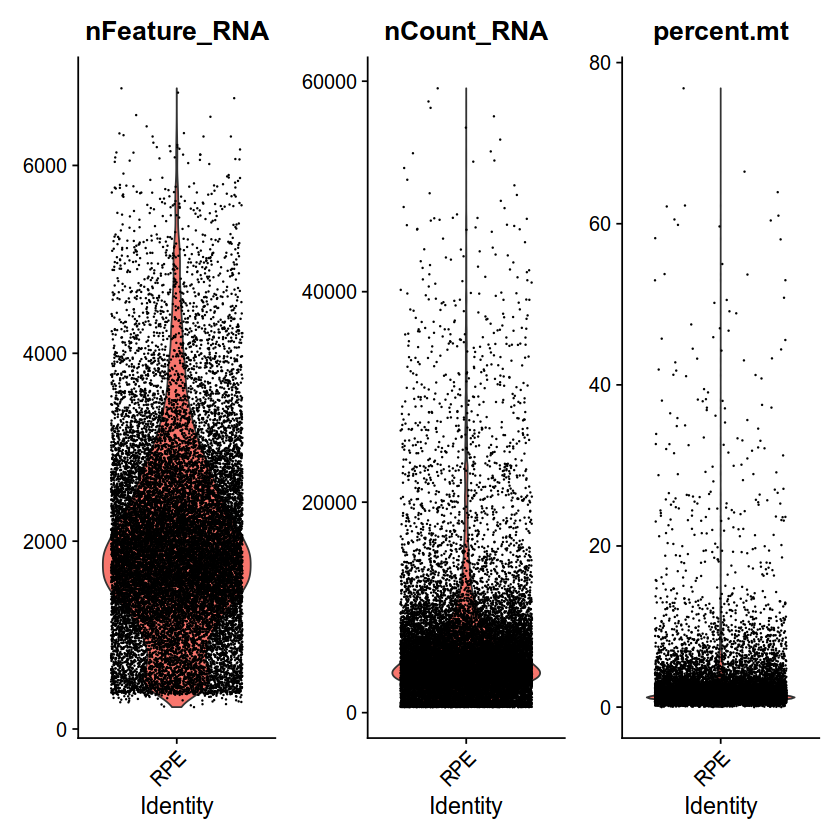

In [11]:
VlnPlot(seurat, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [12]:
seurat$log10GenesPerUMI <- log10(seurat$nFeature_RNA) / log10(seurat$nCount_RNA)

In [13]:
head(seurat@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,log10GenesPerUMI
,<fct>,<dbl>,<int>,<dbl>,<dbl>
AAACCTGAGCAAATCA-1,RPE,6767,2627,3.3397370,0.8927171
AAACCTGAGCGTTTAC-1,RPE,939,597,5.7507987,0.9338334
AAACCTGAGCTAAACA-1,RPE,5172,2091,3.4802784,0.8940924
AAACCTGAGCTCCTCT-1,RPE,4953,1953,2.4631536,0.8906142
AAACCTGAGCTTTGGT-1,RPE,9837,3203,8.7933313,0.8779558
AAACCTGAGGCATGTG-1,RPE,12923,3375,0.6500039,0.8581761


In [14]:
seurat <- subset(seurat, subset = nCount_RNA > 500 & nCount_RNA < 20000 & nFeature_RNA < 6000
                 & nFeature_RNA > 800 & percent.mt < 10 & log10GenesPerUMI >0.8)


In [15]:
seurat

An object of class Seurat 
32285 features across 17448 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


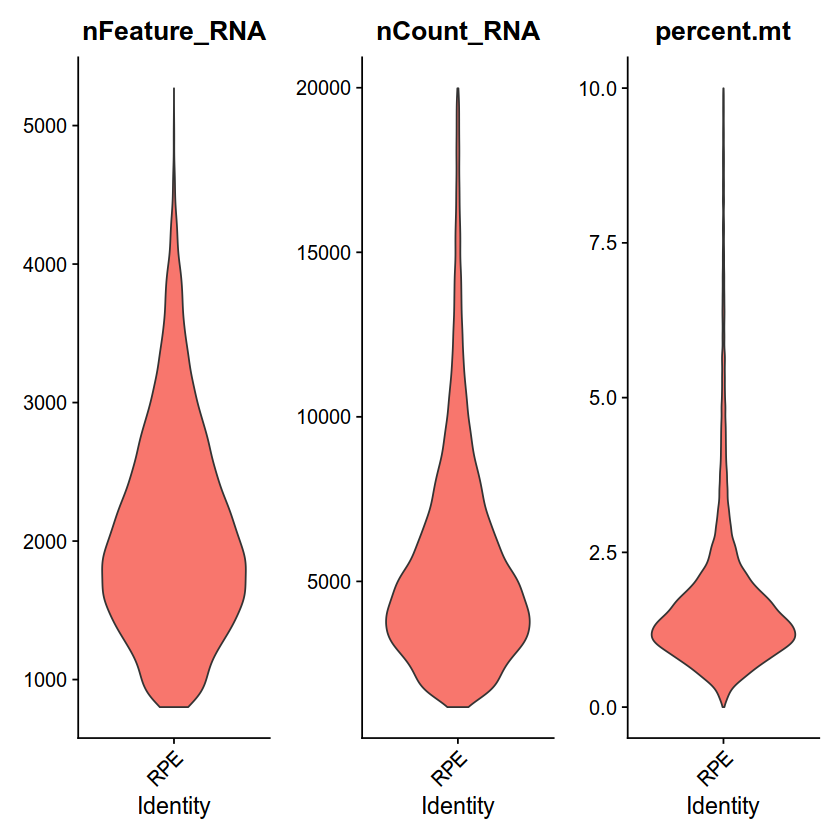

In [16]:
VlnPlot(seurat, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, pt.size=0)

In [17]:
saveRDS(seurat, file = "~//data/retina/h5ad/27_06_RPE_MEL_for_scienic_QC_04_09.rds")

In [18]:
seurat <- NormalizeData(seurat)

Normalizing layer: counts



In [19]:
seurat <- FindVariableFeatures(seurat, nfeatures = 3000)

Finding variable features for layer counts



When using repel, set xnudge and ynudge to 0 for optimal results

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


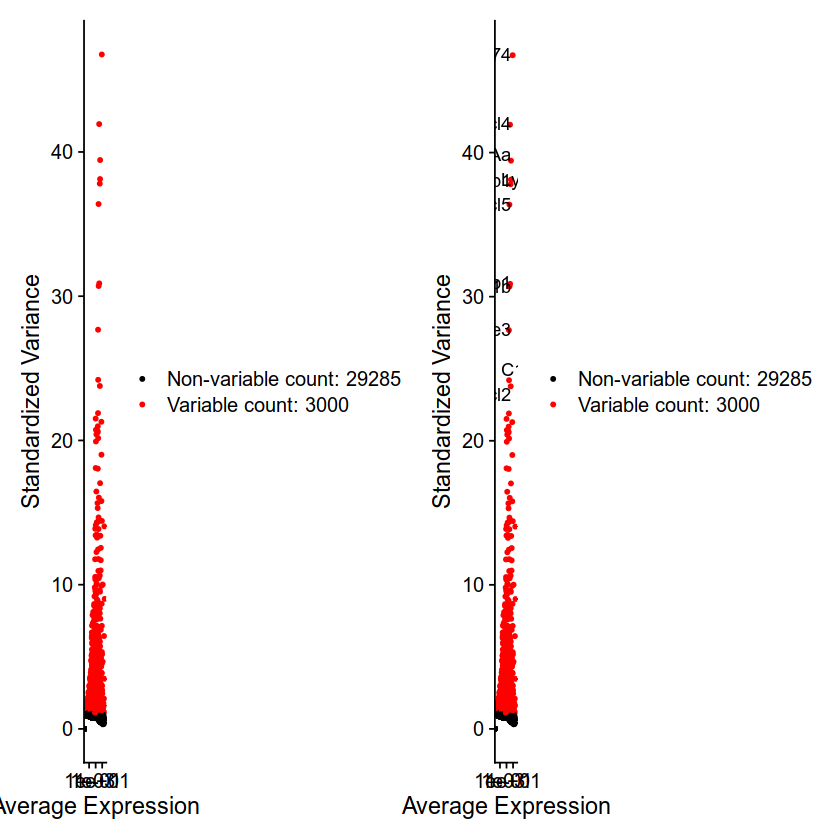

In [20]:
top_features <- head(VariableFeatures(seurat), 20)
plot1 <- VariableFeaturePlot(seurat)
plot2 <- LabelPoints(plot = plot1, points = top_features, repel = TRUE)
plot1 + plot2

In [21]:
seurat <- ScaleData(seurat)

Centering and scaling data matrix



In [22]:
seurat <- RunPCA(seurat, npcs = 30)

PC_ 1 
Positive:  Laptm5, Cd52, Lcp1, Coro1a, Fcer1g, Tyrobp, Ptprc, Ptpn18, Ly86, Cd83 
	   Cytip, Spi1, Rac2, Bcl2a1b, Cd53, Ctss, Pld4, Cybb, Csf1r, Ms4a6c 
	   Cd74, Fyb, Gmfg, Itgb2, Il1b, Selplg, Alox5ap, H2-Aa, Plek, H2-Eb1 
Negative:  Igfbp4, Bgn, Dcn, Mgp, Gsn, Serpinf1, Sparc, Lum, Klf2, Mfap5 
	   Plpp3, Col1a2, Gpc3, Col1a1, Fbln1, Fstl1, Lbp, Cdkn1c, Pgf, Emcn 
	   Crispld2, Gadd45g, Nbl1, Apod, Irf1, Ccn2, S100a6, Emp1, Angpt1, Alpl 
PC_ 2 
Positive:  Ptgds, Ttr, Slc16a8, Rgr, Col9a3, Rdh5, Car14, Cspg5, Trpm3, Rpe65 
	   Slc6a13, Stra6, Krt18, Slc6a20a, Otx2, Pon1, Rlbp1, Car12, Rd3l, Arl6ip1 
	   Mt3, Slc4a5, Lrat, Rrh, Ermn, Cltrn, Trf, Enpp2, Acsl6, Tmem56 
Negative:  Tmsb4x, Laptm5, Cd52, Coro1a, Fcer1g, Lcp1, Tyrobp, H2-D1, Srgn, Cd83 
	   Ly86, Alox5ap, Spi1, Pld4, Ms4a6c, Cytip, Bcl2a1b, Ptpn18, Ptprc, H2-Ab1 
	   Fxyd5, Cd53, Il1b, H2-Aa, Rac2, Cd74, H2-Eb1, Cybb, Ctss, Itgb2 
PC_ 3 
Positive:  Dcn, Serpinf1, Rbp1, Lum, Mfap5, Lbp, Fbln1, Col1a1, Bgn, Gpc3 
	   A

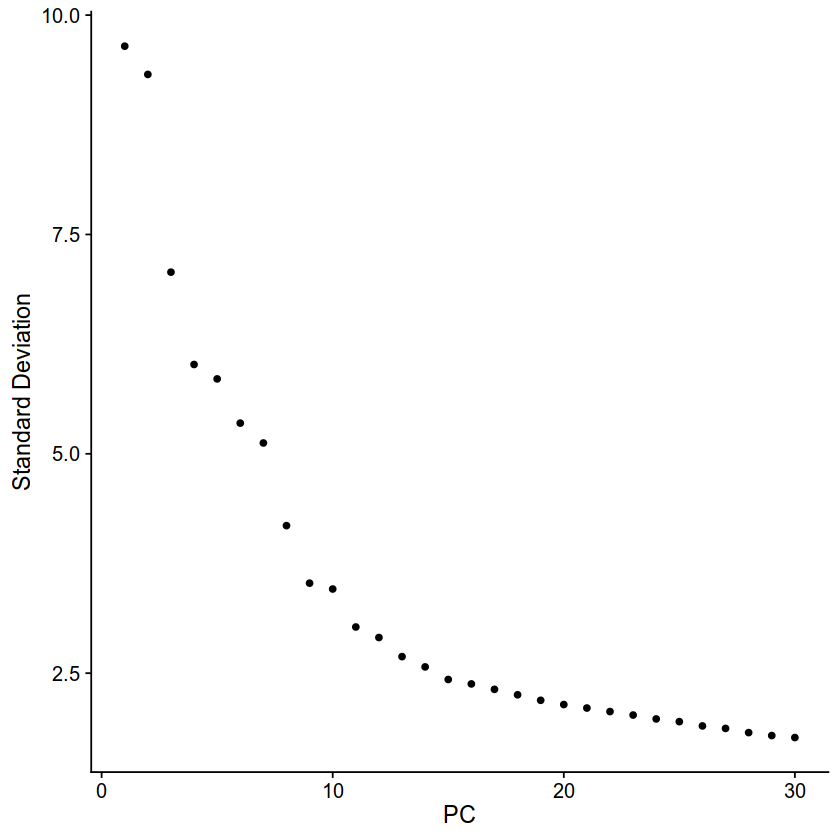

In [23]:
ElbowPlot(seurat, ndims = ncol(Embeddings(seurat, "pca")))

In [24]:
seurat <-FindNeighbors(object = seurat, dims = 1:30)
seurat <-FindClusters(object = seurat)
seurat <-RunUMAP(object = seurat, dims = 1:30)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17448
Number of edges: 558652

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8672
Number of communities: 26
Elapsed time: 2 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:00:15 UMAP embedding parameters a = 0.9922 b = 1.112

10:00:15 Read 17448 rows and found 30 numeric columns

10:00:15 Using Annoy for neighbor search, n_neighbors = 30

10:00:15 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:00:18 Writing NN index file to temp file /tmp/RtmpnH22Pk/file95f6f0ab14e

10:00:18 Searching Annoy index using 1 thread, search_k = 3000

10:00:22 Annoy recall = 100%

10:00:23 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors =

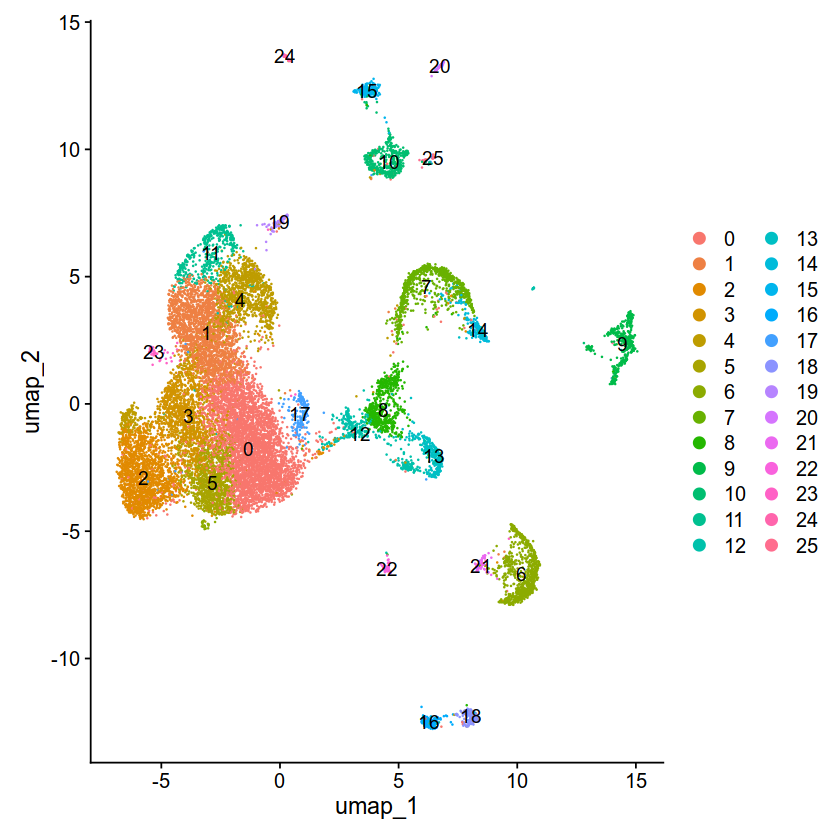

In [25]:
DimPlot(seurat, reduction = "umap", label = TRUE)

In [26]:
# Calculate the expected number of doublets
nExp <- round(ncol(seurat) * 0.07)  # Adjust the expected doublet rate as necessary

# Run doublet detection using the correct function name
seurat <- doubletFinder(seurat, pN = 0.25, pK = 0.09, nExp = nExp, PCs = 1:10)

Loading required package: fields

Loading required package: spam

Spam version 2.10-0 (2023-10-23) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following object is masked from ‘package:Matrix’:

    det


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


Loading required package: viridisLite


Try help(fields) to get started.

Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009



[1] "Creating 5816 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


In [27]:
head(seurat@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,log10GenesPerUMI,RNA_snn_res.0.8,seurat_clusters,pANN_0.25_0.09_1221,DF.classifications_0.25_0.09_1221
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<chr>
AAACCTGAGCAAATCA-1,RPE,6767,2627,3.3397370,0.8927171,8,8,0.30420248,Singlet
AAACCTGAGCTAAACA-1,RPE,5172,2091,3.4802784,0.8940924,6,6,0.30754537,Singlet
AAACCTGAGCTCCTCT-1,RPE,4953,1953,2.4631536,0.8906142,2,2,0.03008596,Singlet
AAACCTGAGCTTTGGT-1,RPE,9837,3203,8.7933313,0.8779558,14,14,0.38252149,Doublet
AAACCTGAGGCATGTG-1,RPE,12923,3375,0.6500039,0.8581761,23,23,0.38299904,Doublet
AAACCTGAGGTAAACT-1,RPE,4340,1827,1.1981567,0.8967004,0,0,0.28366762,Singlet


In [28]:
seurat=seurat[, seurat@meta.data[, 'DF.classifications_0.25_0.09_1221'] == "Singlet"]

In [29]:
seurat <- RunPCA(seurat, npcs = 30)
seurat <-FindNeighbors(object = seurat, dims = 1:20)
seurat <-FindClusters(object = seurat, resolution = 0.1)
seurat <-RunUMAP(object = seurat, dims = 1:20)

PC_ 1 
Positive:  Ptgds, Ttr, Trf, Rgr, Slc16a8, Arl6ip1, Basp1, Car14, Col9a3, Rdh5 
	   Rpe65, Cspg5, Trpm3, Slc6a13, Cst3, Tes, Stra6, Krt18, Rlbp1, Slc6a20a 
	   Otx2, Pon1, Mt3, Slc9a3r1, Lrat, Cltrn, Car12, Rd3l, Rrh, Slc4a5 
Negative:  Igfbp4, Bgn, Dcn, Mgp, Gsn, Serpinf1, Lum, Klf2, Mfap5, Sparc 
	   Plpp3, Fbln1, Col1a2, Col1a1, S100a6, Lbp, Fstl1, Cdkn1c, Gpc3, Pgf 
	   Crispld2, Emcn, Irf1, Gadd45g, Apod, Emp1, Cxcl1, Nbl1, Icam1, Ccn2 
PC_ 2 
Positive:  Laptm5, Cd52, Coro1a, Lcp1, Fcer1g, Tyrobp, Ptpn18, Rac2, Ptprc, Bcl2a1b 
	   Cd83, Cytip, Cd53, Ly86, Srgn, Spi1, H2-Ab1, H2-Aa, Cd74, H2-Eb1 
	   Gmfg, Selplg, Pld4, Ctss, Alox5ap, Il1b, Il2rg, Itgb2, Ms4a6c, Rgs1 
Negative:  Rbp1, Bsg, Ttr, Timp3, Ptgds, Gpx4, Slc16a8, Col9a3, Tspan3, Rgr 
	   Stra6, Cspg5, Trpm3, Tmem98, Rdh5, Slc6a13, Car14, Krt18, Rpe65, Clu 
	   Slc6a20a, Rd3l, Car12, Pon1, Otx2, Rrh, mt-Cytb, Ermn, Enpp2, Slc4a5 
PC_ 3 
Positive:  Myh11, Pcp4l1, Bcam, Tesc, Map3k7cl, Asb2, Olfr558, Filip1l, Nrarp, Gj

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 16227
Number of edges: 523218

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9556
Number of communities: 10
Elapsed time: 2 seconds


10:02:16 UMAP embedding parameters a = 0.9922 b = 1.112

10:02:16 Read 16227 rows and found 20 numeric columns

10:02:16 Using Annoy for neighbor search, n_neighbors = 30

10:02:16 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:02:18 Writing NN index file to temp file /tmp/RtmpnH22Pk/file95f5ca41453

10:02:18 Searching Annoy index using 1 thread, search_k = 3000

10:02:23 Annoy recall = 100%

10:02:23 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:02:24 Initializing from normalized Laplacian + noise (using RSpectra)

10:02:25 Commencing optimization for 200 epochs, with 696496 positive edges

10:02:34 Optimization finished



In [30]:
new.cluster.ids <- c( "Melano", "RPE", "Perycytes", "Macrophages",  "Macrophages","NK",     "Endothelial", "Mesenchymal", "Mesenchymal","Schwann")
names(new.cluster.ids) <- levels(seurat)
seurat <- RenameIdents(seurat, new.cluster.ids)

In [31]:
saveRDS(seurat, file = "~//data/retina/h5ad/27_06_RPE_MEL_for_scienic_umap_04_09.rds")

In [34]:
seurat1 <- readRDS(file = "~//data/retina/h5ad/27_06_RPE_MEL_for_scienic_umap_04_09.rds")

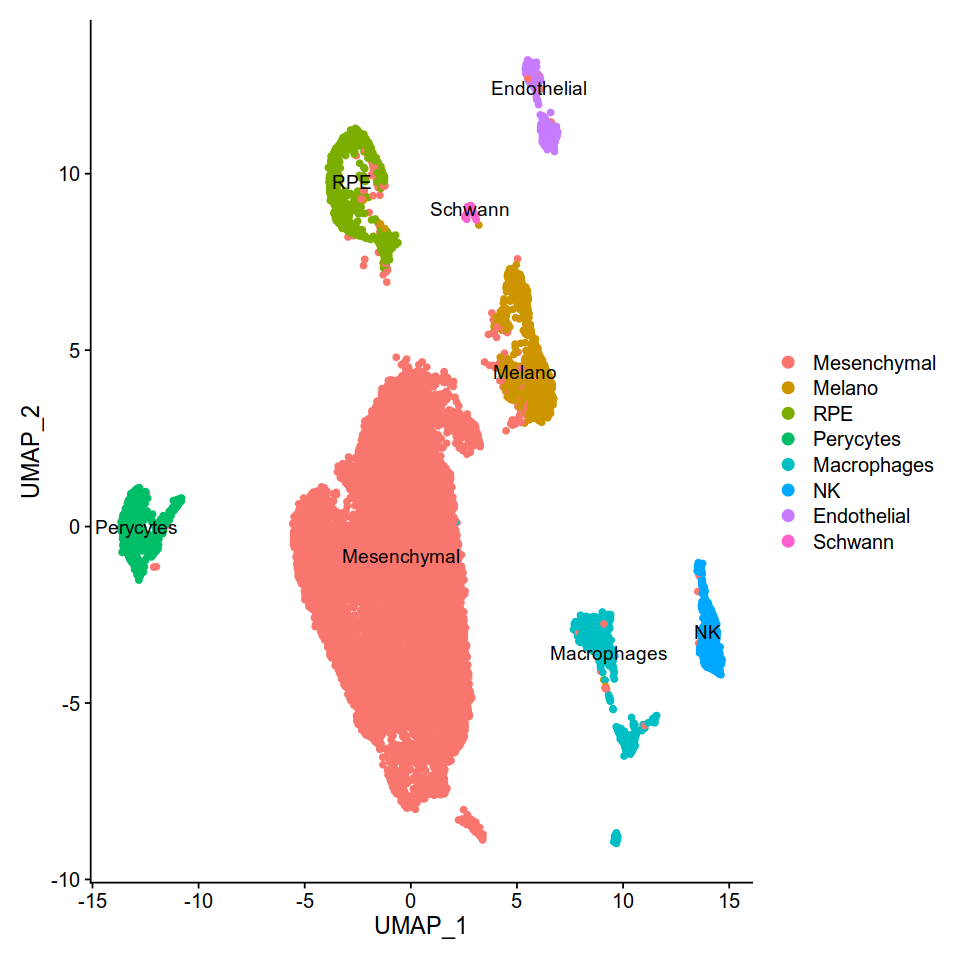

In [35]:
options(repr.plot.width = 8, repr.plot.height =8)
DimPlot(seurat1, reduction = "umap", label = TRUE, pt.size = 1.5)

In [36]:
seurat1.markers <- FindAllMarkers(seurat1, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
seurat1.markers %>%
    group_by(cluster) %>%
    slice_max(n = 2, order_by = avg_log2FC)

Calculating cluster Mesenchymal

For a (much!) faster implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the presto package
--------------------------------------------
install.packages('devtools')
devtools::install_github('immunogenomics/presto')
--------------------------------------------
After installation of presto, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session

Calculating cluster Melano

Calculating cluster RPE

Calculating cluster Perycytes

Calculating cluster Macrophages

Calculating cluster NK

Calculating cluster Endothelial

Calculating cluster Schwann



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
3.123023e-90,3.487779,0.287,0.146,1.008268e-85,Mesenchymal,Myoc
1.642302e-225,3.479015,0.266,0.035,5.302171e-221,Mesenchymal,Prrx2
0.000000e+00,7.022446,0.305,0.006,0.000000e+00,Melano,Snhg7os
0.000000e+00,5.479336,0.386,0.016,0.000000e+00,Melano,Pax3
0.000000e+00,5.812835,0.591,0.015,0.000000e+00,RPE,Gm45895
0.000000e+00,5.638601,0.605,0.012,0.000000e+00,RPE,Gm15222
0.000000e+00,8.019786,0.602,0.012,0.000000e+00,Perycytes,2210407C18Rik
0.000000e+00,7.928502,0.313,0.002,0.000000e+00,Perycytes,Casq2
0.000000e+00,9.109208,0.401,0.002,0.000000e+00,Macrophages,Napsa


In [37]:
head(seurat1.markers)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Cygb,0,3.081414,0.971,0.299,0,Mesenchymal,Cygb
Serpinf1,0,3.154266,0.915,0.249,0,Mesenchymal,Serpinf1
Lum,0,3.144981,0.920,0.255,0,Mesenchymal,Lum
Edn3,0,2.941578,0.944,0.288,0,Mesenchymal,Edn3
Fbln1,0,3.211229,0.809,0.171,0,Mesenchymal,Fbln1
Mfap5,0,3.226048,0.774,0.165,0,Mesenchymal,Mfap5


In [38]:
saveRDS(seurat1, file = "~/data/retina/h5ad/2_09_24_FIG1_embed.rds")

In [39]:
options(repr.plot.width = 10, repr.plot.height =18)
seurat1.markers %>% 
    group_by(cluster) %>%
    top_n(n = 20, wt = avg_log2FC) -> top10
heatmap_plot <-DoHeatmap(seurat1, features = top10$gene) + NoLegend()

Warning message in DoHeatmap(seurat1, features = top10$gene):
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: Abca8b, Col20a1, Kcna6, Rxrg, Luzp2, Gucy2f, Sox6, Prrx2, Aox3, Hs3st3a1”


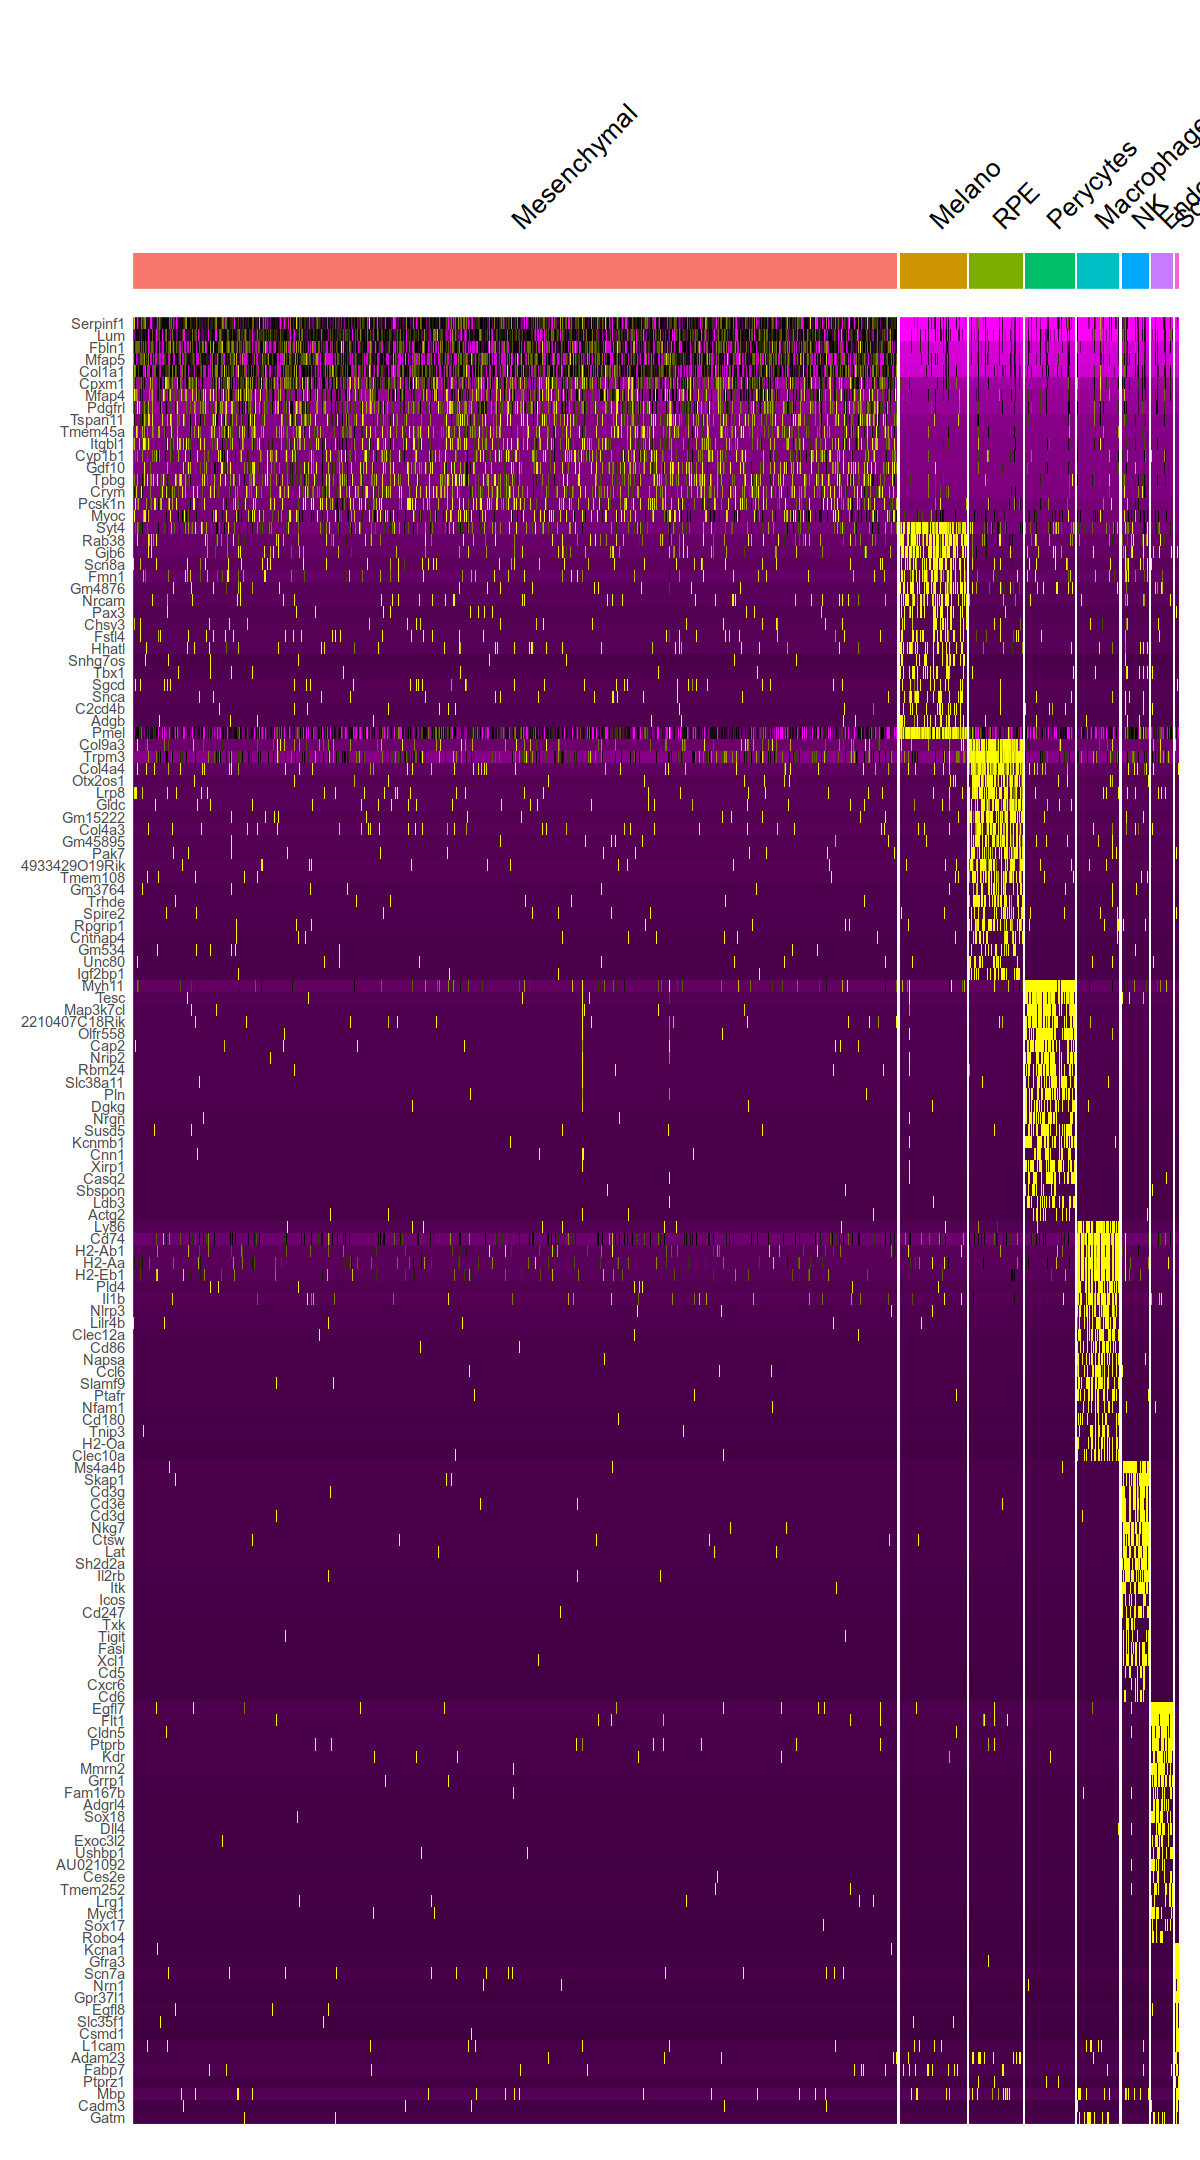

In [41]:
heatmap_plot

In [40]:
saveRDS(seurat1, file = "~/data/retina/h5ad/2_09_24_FIG1_embed.rds")